In [171]:
import pandas as pd
import numpy as np

In [172]:
wines = pd.read_csv("XWines_Slim_1K_wines_150K_ratings\XWines_Slim_1K_wines.csv", encoding="utf-8")
ratings = pd.read_csv("XWines_Slim_1K_wines_150K_ratings\XWines_Slim_150K_ratings.csv", low_memory=False)

# wines = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_100K_wines.csv", encoding="utf-8")
# ratings = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_21M_ratings.csv", low_memory=False)

In [173]:
wines.head(2)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."


In [174]:
wines.columns

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages'],
      dtype='object')

In [175]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WineID      1007 non-null   int64  
 1   WineName    1007 non-null   object 
 2   Type        1007 non-null   object 
 3   Elaborate   1007 non-null   object 
 4   Grapes      1007 non-null   object 
 5   Harmonize   1007 non-null   object 
 6   ABV         1007 non-null   float64
 7   Body        1007 non-null   object 
 8   Acidity     1007 non-null   object 
 9   Code        1007 non-null   object 
 10  Country     1007 non-null   object 
 11  RegionID    1007 non-null   int64  
 12  RegionName  1007 non-null   object 
 13  WineryID    1007 non-null   int64  
 14  WineryName  1007 non-null   object 
 15  Website     900 non-null    object 
 16  Vintages    1007 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 133.9+ KB


In [176]:
wines = wines[
    [
        "WineID",
        "WineName",
        "Type",
        "Elaborate",
        "Grapes",
        "Harmonize",
        "ABV",
        "Body",
        "Acidity",
        "Country",
        "RegionID",
        "WineryID",
        "RegionName",
        "WineryName"
    ]
]

In [177]:
wines.head(3)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionID,WineryID,RegionName,WineryName
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,1001,10001,Serra Gaúcha,Casa Perini
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,Brazil,1001,10001,Serra Gaúcha,Casa Perini
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,Brazil,1001,10002,Serra Gaúcha,Castellamare


In [178]:
wines['Grapes'] = wines['Grapes'].str.replace("[", " ").str.replace("]", " ").str.replace("'", "").str.strip()
wines['Grapes'].head()

0                Muscat/Moscato
1                    Ancellotta
2            Cabernet Sauvignon
3    Cabernet Sauvignon, Merlot
4         Muscat/Moscato Bianco
Name: Grapes, dtype: object

In [179]:
wines['Body'] = wines['Body'].str.replace('-', '')
wines['Body'].head()

0    Mediumbodied
1    Mediumbodied
2      Fullbodied
3      Fullbodied
4    Mediumbodied
Name: Body, dtype: object

In [180]:
wines["Harmonize"] = wines["Harmonize"].str.replace("[", " ").str.replace("]", " ").str.replace("'", "").str.strip()
wines["Harmonize"].head()

0                       Pork, Rich Fish, Shellfish
1    Beef, Barbecue, Codfish, Pasta, Pizza, Cheese
2                              Beef, Lamb, Poultry
3                   Beef, Lamb, Game Meat, Poultry
4                       Pork, Rich Fish, Shellfish
Name: Harmonize, dtype: object

In [181]:
wines.head(3)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionID,WineryID,RegionName,WineryName
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,Muscat/Moscato,"Pork, Rich Fish, Shellfish",7.5,Mediumbodied,High,Brazil,1001,10001,Serra Gaúcha,Casa Perini
1,100002,Ancellotta,Red,Varietal/100%,Ancellotta,"Beef, Barbecue, Codfish, Pasta, Pizza, Cheese",12.0,Mediumbodied,Medium,Brazil,1001,10001,Serra Gaúcha,Casa Perini
2,100003,Cabernet Sauvignon,Red,Varietal/100%,Cabernet Sauvignon,"Beef, Lamb, Poultry",12.0,Fullbodied,High,Brazil,1001,10002,Serra Gaúcha,Castellamare


In [182]:
def check_special_characters(df, column_name, special_characters_pattern):
    rows_with_special_characters = df[df[column_name].str.contains(special_characters_pattern, regex=True, na=False)]
    row_count = len(rows_with_special_characters)
    print("Number of rows with special characters in {}: {}".format(column_name, row_count))
    print(rows_with_special_characters[[column_name]].drop_duplicates().sort_values(by=column_name))

In [183]:
import re
def remove_special_characters(df, column_name, characters_to_remove):
    df[column_name] = df[column_name].str.replace(f'[{re.escape(characters_to_remove)}]', ' ', regex=True)
    return df

In [184]:
characters_to_remove = '[!"#$%°&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [185]:
check_special_characters(wines, 'WineName', characters_to_remove)

Number of rows with special characters in WineName: 184
                                            WineName
453                               101 Moscato d'Asti
727               Abednego Shiraz-Grenache-Mourvedre
564                        Adobe Carmenère (Reserva)
752              Australia Felix Chardonnay-Viognier
454                                   Barbera D'Alba
..                                               ...
729              Wallcliffe Sauvignon Blanc-Sémillon
732       Wilyabrup Valley Cabernet Sauvignon-Merlot
710             Winemaker's Collection Blanc de Noir
415   Winemaker's Collection Montepulciano d'Abruzzo
930  Красностоп Золотовский (Krasnostop Zolotovskiy)

[158 rows x 1 columns]


In [186]:
wines = remove_special_characters(wines, 'WineName', characters_to_remove)
check_special_characters(wines, 'WineName', characters_to_remove)

Number of rows with special characters in WineName: 0
Empty DataFrame
Columns: [WineName]
Index: []


In [187]:
check_special_characters(wines, 'RegionName', characters_to_remove)

Number of rows with special characters in RegionName: 146
                                           RegionName
933                                     Anapa (Анапа)
388                                    Barbera d'Alba
440                                    Barbera d'Asti
191                               Beaujolais-Villages
445                                 Brachetto d'Acqui
562                               Central Valley (CL)
368                       Chablis 1er Cru 'Montmains'
319                                 Chambolle-Musigny
356                    Champagne Grand Cru 'Ambonnay'
256                       Champagne Grand Cru 'Bouzy'
337          Champagne Grand Cru 'Le Mesnil-sur-Oger'
192                               Châteauneuf-du-Pape
405                 Conegliano-Valdobbiadene Prosecco
507  Conegliano-Valdobbiadene Prosecco Superiore Rive
232                      Corton-Charlemagne Grand Cru
554                                    Crimeia (Крим)
332                     

In [188]:
wines = remove_special_characters(wines, 'RegionName', characters_to_remove)
check_special_characters(wines, 'RegionName', characters_to_remove)

Number of rows with special characters in RegionName: 0
Empty DataFrame
Columns: [RegionName]
Index: []


In [189]:
check_special_characters(wines, 'WineryName', characters_to_remove)

Number of rows with special characters in WineryName: 97
                                     WineryName
645                              Achaval-Ferrer
295               Barons de Rothschild (Lafite)
317                           Barton & Guestier
791                      Beaulieu Vineyard (BV)
789                        Beringer Main & Vine
..                                          ...
84                                      Warre's
170                   Weingut Max Ferd. Richter
133             Weingut Nik Weis-St. Urbans-Hof
154     Winzergenossenschaft Mayschoss-Altenahr
930  Винодельня Ведерниковъ (Vedernikov Winery)

[88 rows x 1 columns]


In [190]:
wines = remove_special_characters(wines, 'WineryName', characters_to_remove)
check_special_characters(wines, 'WineryName', characters_to_remove)

Number of rows with special characters in WineryName: 0
Empty DataFrame
Columns: [WineryName]
Index: []


In [191]:
wines.isnull().sum()

WineID        0
WineName      0
Type          0
Elaborate     0
Grapes        0
Harmonize     0
ABV           0
Body          0
Acidity       0
Country       0
RegionID      0
WineryID      0
RegionName    0
WineryName    0
dtype: int64

In [192]:
def split_and_expand_columns(df, column_name, delimiter="/"):
    expanded_columns = df[column_name].str.split(delimiter, expand=True)
    new_columns = [f"{column_name}{i+1}" for i in range(expanded_columns.shape[1])]
    expanded_columns.columns = new_columns

    df = pd.concat([df, expanded_columns], axis=1)
    df = df.fillna("")
    df = df.drop(columns=[column_name])

    return df

In [193]:
wines = split_and_expand_columns(wines, "Harmonize", delimiter=", ")

In [194]:
wines = split_and_expand_columns(wines, "Grapes", delimiter=", ")

In [195]:
wines = split_and_expand_columns(wines, "Elaborate")

In [196]:
wines = split_and_expand_columns(wines, "Type")

In [197]:
print(wines.head(3).to_markdown())

|    |   WineID | WineName           |   ABV | Body         | Acidity   | Country   |   RegionID |   WineryID | RegionName   | WineryName   | Harmonize1   | Harmonize2   | Harmonize3   | Harmonize4   | Harmonize5   | Harmonize6   | Harmonize7   | Harmonize8   | Harmonize9   | Harmonize10   | Harmonize11   | Harmonize12   | Grapes1            | Grapes2   | Grapes3   | Grapes4   | Grapes5   | Grapes6   | Grapes7   | Grapes8   | Grapes9   | Elaborate1   | Elaborate2   | Type1     | Type2   |
|---:|---------:|:-------------------|------:|:-------------|:----------|:----------|-----------:|-----------:|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:-------------|:--------------|:--------------|:--------------|:-------------------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:-------------|:-------------|:----------|:--------|
|  0 |   100

In [198]:
common_columns = ['WineName', 'Body', 'Acidity', 'Country', 'RegionName', 'WineryName', 'ABV']
grapes_columns = [f'Grapes{i}' for i in range(1, 10)]
harmonize_columns = [f'Harmonize{i}' for i in range(1, 7)]
type_columns = [f'Type{i}' for i in range(1, 3)]
elaborate_columns = [f'Elaborate{i}' for i in range(1, 3)]
all_columns = common_columns + grapes_columns + harmonize_columns + type_columns + elaborate_columns
wines['Attributes'] = wines[all_columns].astype(str).agg(' '.join, axis=1)

In [199]:
print(wines['Attributes'].head(3).to_markdown())

|    | Attributes                                                                                                                                           |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Espumante Moscatel Mediumbodied High Brazil Serra Gaúcha Casa Perini 7.5 Muscat/Moscato         Pork Rich Fish Shellfish    Sparkling  Varietal 100% |
|  1 | Ancellotta Mediumbodied Medium Brazil Serra Gaúcha Casa Perini 12.0 Ancellotta         Beef Barbecue Codfish Pasta Pizza Cheese Red  Varietal 100%   |
|  2 | Cabernet Sauvignon Fullbodied High Brazil Serra Gaúcha Castellamare 12.0 Cabernet Sauvignon         Beef Lamb Poultry    Red  Varietal 100%          |


Build model:
- tranform attributes (features) of wines to tf-idf
- compute simmilarity between wine items based on tf-idf


In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# fit and transform the Attributes column
tfidf_matrix = vectorizer.fit_transform(wines['Attributes'])

# shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(1007, 2414)


In [201]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine similarity matrix between wines
wine_similarities = cosine_similarity(tfidf_matrix)

# shape of the similarity matrix
print(wine_similarities.shape)


(1007, 1007)


In [202]:
print(type(wine_similarities))

<class 'numpy.ndarray'>


In [203]:
import numpy as np

# save similarity matrix to file
np.save('wine_similarities.npy', wine_similarities)

In [204]:
ratings.head(2).to_markdown

<bound method DataFrame.to_markdown of    RatingID   UserID  WineID Vintage  Rating                 Date
0       143  1356810  103471    1950     4.5  2021-11-02 20:52:59
1       199  1173759  111415    1951     5.0  2015-08-20 17:46:26>

In [205]:
# Save the fully processed wines DataFrame
initial_wines_df = wines.copy() 

In [206]:
# create a set of all wine IDs
all_wine_ids = set(ratings['WineID'].unique())

In [207]:
def get_unrated_wines(user_id, train_ratings, all_wine_ids):
    '''
    Get the list of wines that the user has not rated
    
    @param user_id: user ID
    @param train_ratings: ratings DataFrame to consider
    @param all_wine_ids: set of all wine IDs
    @return: list of wine IDs that the user has not rated
    '''
    rated_wines = set(train_ratings[train_ratings['UserID'] == user_id]['WineID'].unique())
    unrated_wines = all_wine_ids - rated_wines
    return list(unrated_wines)

In [208]:
import numpy as np

# mapping between WineID and matrix index
wine_id_to_idx = {wine_id: idx for idx, wine_id in enumerate(wines['WineID'])}
idx_to_wine_id = {idx: wine_id for idx, wine_id in enumerate(wines['WineID'])}

In [209]:
def get_similarities(unrated_wine, rated_wines, similarity_matrix):
    '''
    Get similarity scores between an unrated wine and a list of rated wines

    @param unrated_wine: WineID of the unrated wine
    @param rated_wines: list of WineIDs of the rated wines
    @param similarity_matrix: cosine similarity matrix between wines
    @return: list of tuples (WineID, similarity_score) for the rated wines
    '''
    similarities = []
    if unrated_wine not in wine_id_to_idx:
        return similarities  # No similarity data for this wine
    
    unrated_wine_idx = wine_id_to_idx[unrated_wine]
    
    for rated_wine in rated_wines:
        if rated_wine not in wine_id_to_idx:
            continue  # Skip if rated wine not in mapping
        rated_wine_idx = wine_id_to_idx[rated_wine]
        similarity = similarity_matrix[unrated_wine_idx, rated_wine_idx]
        similarities.append((rated_wine, similarity))
    
    # Sort by similarity and select top k
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities

In [210]:
def predict_rating(user_id, unrated_wine, train_ratings):
    '''
    Predict the rating of an unrated wine for a user based on the similarities of unrated wine to rated wines of the user

    @param user_id: user ID
    @param unrated_wine: WineID of the unrated wine
    @param train_ratings: ratings DataFrame to consider
    @return: predicted rating of the unrated wine for the user
    '''
    user_ratings = train_ratings[train_ratings['UserID'] == user_id][['WineID', 'Rating']]
    rated_wines = user_ratings['WineID'].tolist()
    
    if len(rated_wines) == 0:
        return np.nan  # Shouldn't happen
    
    k_similar_wines = get_similarities(unrated_wine, rated_wines, wine_similarities)
    
    numerator = 0
    denominator = 0
    for wine, similarity in k_similar_wines:
        rating = user_ratings[user_ratings['WineID'] == wine]['Rating'].values[0]
        numerator += similarity * rating
        denominator += abs(similarity)
    
    if denominator == 0:
        # Impute with user's average rating from training set
        user_mean = user_ratings['Rating'].mean()
        return user_mean
    
    return numerator / denominator

In [211]:
# Predict all ratings for a given user
def predict_all_ratings(user_id):
    '''
    Method to predict ratings of all unrated wines for a given user

    @param user_id: user ID
    @return: dictionary of predicted ratings for unrated wines
    '''
    unrated_wines = get_unrated_wines(user_id, ratings, all_wine_ids)
    predictions = {}
    
    for wine in unrated_wines:
        predicted_rating = predict_rating(user_id, wine, ratings)
        predictions[wine] = predicted_rating
    
    return predictions

# Recommend top-N wines to the user based on predicted ratings
def recommend_wines(user_id, N=10):
    '''
    Recommend top-N wines to the user based on predicted ratings of unrated wines

    @param user_id: user ID
    @param N: number of wines to recommend
    @return: list of top-N recommended wines with predicted ratings
    '''
    predicted_ratings = predict_all_ratings(user_id)
    # Sort wines by predicted rating in descending order
    recommended_wines = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    
    return recommended_wines[:N]  # Return top N recommended wines

In [212]:
# Example usage
user_id = 1209683
top_recommendations = recommend_wines(user_id, N=10)

# Print the top 10 recommendations for the user
print(top_recommendations)

KeyboardInterrupt: 

In [148]:
n = 3

# Group by UserID and count the number of ratings for each user
user_rating_counts = ratings.groupby('UserID').size()

# Filter users who rated fewer than 3 wines
users_with_fewer_than_n_ratings = user_rating_counts[user_rating_counts < n]

# Count the number of such users
num_users_with_fewer_than_n_ratings = users_with_fewer_than_n_ratings.count()

print(f"Number of users who rated fewer than {n} wines: {num_users_with_fewer_than_n_ratings}")

Number of users who rated fewer than 3 wines: 257


In [149]:
users_ratings_dict = {user_id: ratings[ratings['UserID'] == user_id] for user_id in ratings['UserID'].unique()}

# new dictionary to store users with 3 or more reviews
filtered_users_ratings_dict = {user_id: reviews for user_id, reviews in users_ratings_dict.items() if len(reviews) >= 3}

# Optionally, if you want to modify the original dictionary in place:
users_ratings_dict = filtered_users_ratings_dict

In [150]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Leave-One-Out cross-validation for a single user
def loo_split_user_data(user_ratings):
    '''
    Leave one rating out for the user and return (train, test) pairs for each LOO step.

    @param user_ratings: DataFrame containing all ratings for a single user
    @return: train, test pairs for each LOO step
    '''
    for i in range(len(user_ratings)):
        test = user_ratings.iloc[[i]]  # One row as the test set
        train = user_ratings.drop(user_ratings.index[i])   # All remaining rows as the training set
        yield train, test

# Function to apply LOO for all users and calculate the overall error
def loo_evaluate(users_ratings_dict):
    '''
    Perform LOO (leave-one-out) evaluation for all users and return the overall error.

    @param users_ratings_dict: dictionary of user and his/her ratings
    @return: overall RMSE or MAE for the evaluation
    '''
    true_ratings = []
    predicted_ratings = []
    
    for user_id, user_ratings in users_ratings_dict.items():
        # For each user, perform LOO
        for train_ratings, test_rating in loo_split_user_data(user_ratings):
            # Get the wine to predict
            test_wine = test_rating['WineID'].values[0]
            true_rating = test_rating['Rating'].values[0]
            
            # Predict the rating using the training set
            predicted_rating = predict_rating(user_id, test_wine, train_ratings)
            
            # Store the true and predicted ratings
            true_ratings.append(true_rating)
            predicted_ratings.append(predicted_rating)
    
    # Calculate RMSE or MAE for the overall evaluation
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return rmse

# Usage
loo_rmse = loo_evaluate(users_ratings_dict)
print(f"LOO RMSE: {loo_rmse}")


LOO RMSE: 0.6075902669374107


In [151]:
from sklearn.model_selection import train_test_split

# Train-test split for a single user's ratings
def split_user_data(user_ratings, test_size=0.2):
    '''
    Split user's ratings into train and test sets using sklearn's train_test_split.

    @param user_ratings: DataFrame containing all ratings for a single user
    @param test_size: proportion of the test set
    @return: train, test split of the user's ratings
    '''
    train, test = train_test_split(user_ratings, test_size=test_size, random_state=42)
    return train, test

# Function to apply Train-Test split for all users and calculate the overall error
def train_test_evaluate(users_ratings_dict):
    '''
    Perform train-test split evaluation for all users and return the overall error.

    @param users_ratings_dict: dictionary of user and his/her ratings
    @return: overall RMSE or MAE for the evaluation
    '''
    true_ratings = []
    predicted_ratings = []
    
    for user_id, user_ratings in users_ratings_dict.items():
        # Split the data into train and test
        train_ratings, test_ratings = split_user_data(user_ratings)
        
        # Predict ratings for the test set
        for idx, test_row in test_ratings.iterrows():
            test_wine = test_row['WineID']
            true_rating = test_row['Rating']
            
            # Predict the rating using the training set
            predicted_rating = predict_rating(user_id, test_wine, train_ratings)
            
            # Store the true and predicted ratings
            true_ratings.append(true_rating)
            predicted_ratings.append(predicted_rating)
    
    # Calculate RMSE or MAE for the overall evaluation
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return rmse

# Example usage
train_test_rmse = train_test_evaluate(users_ratings_dict)
print(f"Train-Test RMSE: {train_test_rmse}")


Train-Test RMSE: 0.632960230003232


-----------------------------------------------------------------------------------------------------------------------------------------------

What's next:

a) Diversity:
Measure the average pairwise distance between recommended wines. Use features like grape types, region, or flavor profile for distance calculation.

b) Novelty:
Calculate the popularity of each wine in the training set. Measure the average inverse popularity of recommended wines.

c) Serendipity:
Combine unexpectedness (recommending wines different from user's usual preferences) with relevance (high predicted ratings).


Fix:
Disadvantages:
- Feature Dependency: Requires comprehensive and relevant item features.
- Limited Discovery: May not introduce users to diverse or serendipitous items outside their established preferences.

In [152]:
from sklearn.model_selection import GroupShuffleSplit

def split_ratings_groupwise(ratings, test_size=0.2, random_state=42):
    '''
    Split ratings data into training and test sets using group-wise shuffle split.
    
    @param ratings: DataFrame containing ratings data with a 'UserID' column
    @param test_size: float, proportion of the dataset to include in the test split (default: 0.2)
    @param random_state: int, seed used by the random number generator (default: 42)
    @return: tuple containing two DataFrames (train_ratings, test_ratings)
    '''
    gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    train_idx, test_idx = next(gss.split(ratings, groups=ratings['UserID']))
    train_ratings = ratings.iloc[train_idx].reset_index(drop=True)
    test_ratings = ratings.iloc[test_idx].reset_index(drop=True)
    return train_ratings, test_ratings

# Perform the group-wise split
train_ratings, test_ratings = split_ratings_groupwise(ratings, test_size=0.2)

print(f"Training set size: {train_ratings.shape}")
print(f"Test set size: {test_ratings.shape}")


Training set size: (120182, 6)
Test set size: (29818, 6)


In [153]:
def predict_test_set_ratings(test_ratings, train_ratings, k=5):
    '''
    Predict ratings for the test set using the training data and handle missing predictions.

    @param test_ratings: DataFrame containing the test set ratings
    @param train_ratings: DataFrame containing the training set ratings
    @param k: int, number of nearest neighbors to use in prediction (default: 5)
    @return: tuple of two numpy arrays (predictions, true_ratings)
    '''
    predictions = []
    true_ratings = []
    
    for index, row in test_ratings.iterrows():
        user_id = row['UserID']
        wine_id = row['WineID']
        true_rating = row['Rating']
        
        predicted_rating = predict_rating(user_id, wine_id, train_ratings)
        
        # Handle cases where prediction could still be NaN
        if np.isnan(predicted_rating):
            # Option 1: Impute with user's mean rating from training set
            user_train_ratings = train_ratings[train_ratings['UserID'] == user_id]['Rating']
            if len(user_train_ratings) > 0:
                predicted_rating = user_train_ratings.mean()
            else:
                # Option 2: Impute with global mean rating
                predicted_rating = train_ratings['Rating'].mean()
        
        predictions.append(predicted_rating)
        true_ratings.append(true_rating)
    
    return np.array(predictions), np.array(true_ratings)

In [154]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(predicted_ratings, true_ratings):
    mse = mean_squared_error(true_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    return rmse

# 5. Predict Ratings for the Test Set
predicted_ratings, true_ratings = predict_test_set_ratings(test_ratings, train_ratings, k=5)

# 6. Calculate and Print RMSE
rmse = calculate_rmse(predicted_ratings, true_ratings)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.6474061247419193


In [155]:
from sklearn.model_selection import GroupKFold

def cross_validate(ratings, k_folds=5, test_size=0.2, k=5):
    '''
    Perform k-fold cross-validation on the ratings data using GroupKFold.

    @param ratings: DataFrame containing the ratings data with 'UserID' column
    @param k_folds: int, number of folds for cross-validation (default: 5)
    @param test_size: float, proportion of the dataset to include in the test split (default: 0.2)
    @param k: int, number of nearest neighbors to use in prediction (default: 5)
    @return: None (prints RMSE scores for each fold and average RMSE)
    '''
    gkf = GroupKFold(n_splits=k_folds)
    rmse_scores = []
    
    for train_idx, test_idx in gkf.split(ratings, groups=ratings['UserID']):
        train_ratings_fold = ratings.iloc[train_idx].reset_index(drop=True)
        test_ratings_fold = ratings.iloc[test_idx].reset_index(drop=True)
        
        predicted, true = predict_test_set_ratings(test_ratings_fold, train_ratings_fold, k)
        
        # Handle any remaining NaNs
        if np.isnan(predicted).sum() > 0:
            user_means = train_ratings_fold.groupby('UserID')['Rating'].mean().to_dict()
            predicted = [user_means.get(uid, train_ratings_fold['Rating'].mean()) 
                         if np.isnan(r) else r for r, uid in zip(predicted, test_ratings_fold['UserID'])]
            predicted = np.array(predicted)
        
        rmse = calculate_rmse(predicted, true)
        rmse_scores.append(rmse)
        print(f"Fold RMSE: {rmse}")
    
    print(f"Average RMSE across {k_folds} folds: {np.mean(rmse_scores)}")

# Example usage:
cross_validate(ratings, k_folds=5, test_size=0.2, k=5)

Fold RMSE: 0.6549951425949024
Fold RMSE: 0.651390180810434
Fold RMSE: 0.6552810320691294
Fold RMSE: 0.6459695353288084
Fold RMSE: 0.6440909097324693
Average RMSE across 5 folds: 0.6503453601071486


In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GroupKFold

def evaluate_model(test_ratings, train_ratings, k=5):
    '''
    Evaluate the model by predicting ratings for the test set using the training data.

    @param test_ratings: DataFrame containing the test set ratings
    @param train_ratings: DataFrame containing the training set ratings
    @param k: int, number of nearest neighbors to use in prediction (default: 5)
    @return: tuple of two numpy arrays (predictions, true_ratings)
    '''
    predictions = []
    true_ratings = []
    
    for index, row in test_ratings.iterrows():
        user_id = row['UserID']
        wine_id = row['WineID']
        true_rating = row['Rating']
        
        predicted_rating = predict_rating(user_id, wine_id, train_ratings)
        
        # Handle cases where prediction could still be NaN
        if np.isnan(predicted_rating):
            user_train_ratings = train_ratings[train_ratings['UserID'] == user_id]['Rating']
            if len(user_train_ratings) > 0:
                predicted_rating = user_train_ratings.mean()
            else:
                predicted_rating = train_ratings['Rating'].mean()
        
        predictions.append(predicted_rating)
        true_ratings.append(true_rating)
    
    return np.array(predictions), np.array(true_ratings)

In [157]:
def calculate_precision_recall_f1(predicted_ratings, true_ratings, threshold=3.5):
    # Binarize the ratings based on the threshold
    predicted_binary = (predicted_ratings >= threshold).astype(int)
    true_binary = (true_ratings >= threshold).astype(int)
    
    precision, recall, f1, _ = precision_recall_fscore_support(true_binary, predicted_binary, average='binary')
    return precision, recall, f1

Fold RMSE: 0.6549951425949024, F1: 0.9019636549969805
Fold RMSE: 0.651390180810434, F1: 0.9083366689712893
Fold RMSE: 0.6552810320691294, F1: 0.9070042808998998
Fold RMSE: 0.6459695353288084, F1: 0.9033283983111257
Fold RMSE: 0.6440909097324693, F1: 0.9071038251366119
Average RMSE across 5 folds: 0.6503453601071486
Average F1 across 5 folds: 0.9055473656631815


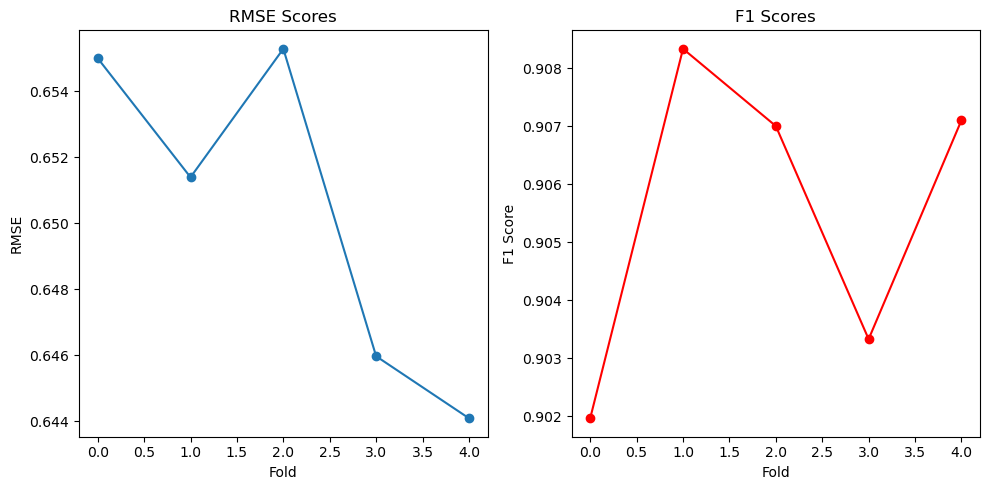

In [158]:
def cross_validate_with_metrics(ratings, k_folds=5, k=5, threshold=3.5):
    '''
    Perform k-fold cross-validation on the ratings data using GroupKFold and calculate multiple evaluation metrics.

    @param ratings: DataFrame containing the ratings data with 'UserID' column
    @param k_folds: int, number of folds for cross-validation (default: 5)
    @param k: int, number of nearest neighbors to use in prediction (default: 5)
    @param threshold: float, threshold for binary classification in F1 score calculation (default: 3.5)
    @return: None (prints and plots RMSE and F1 scores for each fold and their averages)
    '''
    gkf = GroupKFold(n_splits=k_folds)
    rmse_scores = []
    f1_scores = []
    
    for train_idx, test_idx in gkf.split(ratings, groups=ratings['UserID']):
        train_ratings_fold = ratings.iloc[train_idx].reset_index(drop=True)
        test_ratings_fold = ratings.iloc[test_idx].reset_index(drop=True)
        
        predicted, true = evaluate_model(test_ratings_fold, train_ratings_fold, k)
        
        # Handle any remaining NaNs
        if np.isnan(predicted).sum() > 0:
            user_means = train_ratings_fold.groupby('UserID')['Rating'].mean().to_dict()
            predicted = [user_means.get(uid, train_ratings_fold['Rating'].mean()) 
                         if np.isnan(r) else r for r, uid in zip(predicted, test_ratings_fold['UserID'])]
            predicted = np.array(predicted)
        
        rmse = calculate_rmse(predicted, true)
        _, _, f1 = calculate_precision_recall_f1(predicted, true, threshold)
        
        rmse_scores.append(rmse)
        f1_scores.append(f1)
        
        print(f"Fold RMSE: {rmse}, F1: {f1}")
    
    print(f"Average RMSE across {k_folds} folds: {np.mean(rmse_scores)}")
    print(f"Average F1 across {k_folds} folds: {np.mean(f1_scores)}")
    
    # Plotting the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(rmse_scores, marker='o')
    plt.title('RMSE Scores')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(f1_scores, marker='o', color='red')
    plt.title('F1 Scores')
    plt.xlabel('Fold')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()

cross_validate_with_metrics(ratings, k_folds=5, k=5, threshold=3.5)

Group Recommender (Using KNN)

In [159]:
def group_recommender_knn(users, wines):
    '''
    Predict ratings for a group using KNN with average aggregation strategy.

    @param users: list of user IDs
    @param wines: list of wine IDs
    @return: list of recommended wines for the group
    '''
    group_predictions = {}

    # Predict ratings for each user in the group
    user_ratings = {}
    for user in users:
        user_ratings[user] = predict_all_ratings(user)

    # Aggregate predictions using the average strategy
    for wine in wines:
        total_rating = 0
        for user in users:
            total_rating += user_ratings[user].get(wine, 0)
        group_predictions[wine] = total_rating / len(users)

    # Return sorted list of recommended wines for the group
    recommended_wines = sorted(group_predictions.items(), key=lambda x: x[1], reverse=True)
    return recommended_wines

In [160]:

import random
def generate_synthetic_groups(user_pool, group_sizes):
    '''
    Generate synthetic groups of random users.

    @param user_pool: list of all user IDs
    @param group_sizes: list of group sizes to generate
    @return: list of synthetic groups
    '''
    synthetic_groups = []

    # Create groups of different sizes
    for size in group_sizes:
        group = random.sample(user_pool, size)
        synthetic_groups.append(group)

    return synthetic_groups

In [161]:
import math
def rmse_group(predictions, actual_ratings):
    '''
    Calculate RMSE for the group predictions.

    @param predictions: dictionary of predicted ratings
    @param actual_ratings: dictionary of actual ratings
    @return: RMSE value
    '''
    errors = [(predictions[wine] - actual_ratings[wine]) ** 2 for wine in actual_ratings]
    mean_error = sum(errors) / len(errors)
    return math.sqrt(mean_error)

In [162]:
def evaluate_group_recommender(user_pool, wines, actual_ratings, group_sizes):
    '''
    Evaluate the group recommender on synthetic groups.

    @param user_pool: list of all user IDs
    @param wines: list of all wine IDs
    @param actual_ratings: dictionary of actual ratings for evaluation
    @param group_sizes: list of group sizes to evaluate
    '''
    # Generate synthetic groups of users
    synthetic_groups = generate_synthetic_groups(user_pool, group_sizes)

    # Iterate through each group and evaluate
    for group in synthetic_groups:
        print(f"Evaluating group of size {len(group)}:")
        
        # Predict group ratings using the KNN recommender
        predicted_ratings = group_recommender_knn(group, wines)
        
        # Calculate and print RMSE for the group
        rmse = rmse_group(dict(predicted_ratings), actual_ratings)
        print(f"Group RMSE: {rmse}\n")

In [163]:
user_pool = ratings['UserID'].unique().tolist()  
wines = ratings['WineID'].unique().tolist()      
actual_ratings = {wine: ratings[ratings['WineID'] == wine]['Rating'].mean() for wine in wines}  
group_sizes = [2, 3, 5, 10]  # Test with group sizes of 2, 3, 4, and 5 users

# Run the evaluation
evaluate_group_recommender(user_pool, wines, actual_ratings, group_sizes)

Evaluating group of size 2:
Group RMSE: 0.5511643154096261

Evaluating group of size 3:
Group RMSE: 0.5245198731946257

Evaluating group of size 5:
Group RMSE: 0.48692925431664535

Evaluating group of size 10:
Group RMSE: 0.4689320165997922



In [166]:
initial_wines_df.head()

,WineID,WineName,ABV,Body,Acidity,Country,RegionID,WineryID,RegionName,WineryName,...,Grapes5,Grapes6,Grapes7,Grapes8,Grapes9,Elaborate1,Elaborate2,Type1,Type2,Attributes
0,100001,Espumante Moscatel,7.5,Mediumbodied,High,Brazil,1001,10001,Serra Gaúcha,Casa Perini,...,,,,,,Varietal,100%,Sparkling,,Espumante Moscatel Mediumbodied High Brazil Se...
1,100002,Ancellotta,12.0,Mediumbodied,Medium,Brazil,1001,10001,Serra Gaúcha,Casa Perini,...,,,,,,Varietal,100%,Red,,Ancellotta Mediumbodied Medium Brazil Serra Ga...
2,100003,Cabernet Sauvignon,12.0,Fullbodied,High,Brazil,1001,10002,Serra Gaúcha,Castellamare,...,,,,,,Varietal,100%,Red,,Cabernet Sauvignon Fullbodied High Brazil Serr...
3,100005,Maison de Ville Cabernet Merlot,11.0,Fullbodied,Medium,Brazil,1001,10000,Serra Gaúcha,Aurora,...,,,,,,Assemblage,Bordeaux Red Blend,Red,,Maison de Ville Cabernet Merlot Fullbodied Med...
4,100007,Do Lugar Moscatel Espumantes,7.5,Mediumbodied,High,Brazil,1001,10012,Serra Gaúcha,Dal Pizzol,...,,,,,,Varietal,100%,Sparkling,,Do Lugar Moscatel Espumantes Mediumbodied High...


In [225]:
import random
import math
import pandas as pd

# Assuming 'ratings' and 'wines' DataFrames are already loaded and preprocessed as described

# Define the functions as provided earlier

def group_recommender_knn(users, wine_ids):
    '''
    Recommends wines for a group of users using KNN with average aggregation strategy.

    @param users: List of user IDs.
    @param wine_ids: List of wine IDs.
    
    @return: List of wines sorted by predicted group ratings.
    '''
    group_predictions = {}

    # Predict ratings for each user in the group
    user_ratings = {}
    for user in users:
        user_ratings[user] = predict_all_ratings(user)

    # Aggregate predictions using the average strategy
    for wine in wine_ids:
        total_rating = 0
        for user in users:
            total_rating += user_ratings[user].get(wine, 0)
        group_predictions[wine] = total_rating / len(users)

    # Return sorted list of recommended wines for the group
    recommended_wines = sorted(group_predictions.items(), key=lambda x: x[1], reverse=True)
    return recommended_wines

def generate_synthetic_groups(user_pool, group_sizes):
    synthetic_groups = []

    # Create groups of different sizes
    for size in group_sizes:
        group = random.sample(user_pool, size)
        synthetic_groups.append(group)

    return synthetic_groups

def rmse_group(predictions, actual_ratings):
    errors = [(predictions[wine] - actual_ratings[wine]) ** 2 for wine in actual_ratings]
    mean_error = sum(errors) / len(errors)
    return math.sqrt(mean_error)

def evaluate_group_recommender(user_pool, wine_ids, actual_ratings, group_sizes):
    synthetic_groups = generate_synthetic_groups(user_pool, group_sizes)

    for group in synthetic_groups:
        print(f"Evaluating group of size {len(group)}:")
        predicted_ratings = group_recommender_knn(group, wine_ids)
        rmse = rmse_group(dict(predicted_ratings), actual_ratings)
        print(f"Group RMSE: {rmse}\n")


In [226]:
# Assuming 'user_pool' is a list of users, 'wine_ids' is a list of wine IDs,
# 'actual_ratings' is a dictionary of actual ratings for evaluation purposes

user_pool = ratings['UserID'].unique().tolist()  # List of all users
wine_ids = ratings['WineID'].unique().tolist()   # List of all wine IDs
actual_ratings = {wine: ratings[ratings['WineID'] == wine]['Rating'].mean() for wine in wine_ids}  # Dictionary with actual ratings for each wine
group_sizes = [2, 3, 5, 10]  # Test with group sizes of 2, 3, 5, and 10 users

# Generate synthetic groups of users
synthetic_groups = generate_synthetic_groups(user_pool, group_sizes)

# Display the generated groups
for i, group in enumerate(synthetic_groups):
    print(f"Group {i+1} (size {len(group)}): {group}")

# Predict group ratings using the KNN recommender
for i, group in enumerate(synthetic_groups):
    print(f"\nRecommending wines for group {i+1} (size {len(group)}):")
    predicted_ratings = group_recommender_knn(group, wine_ids)
    
    # Display the top 3 recommended wines for the group
    top_recommendations = predicted_ratings[:3]
    print(f"Top 3 recommendations for group {i+1}:")
    for wine_id, rating in top_recommendations:
        
        # Access the wine details from the original wines DataFrame
        wine_details = initial_wines_df[initial_wines_df['WineID'] == wine_id].iloc[0]
        
        # # Print the wine details
        # print(f"WineID: {wine_id}, Predicted Rating: {rating:.2f}, WineName: {wine_details['WineName']}, Type: {wine_details['Type1']}, Region: {wine_details['RegionName']}, Winery: {wine_details['WineryName']}")
        
        # Concatenate the wine details into one string
        details = f"WineID: {wine_id}, Predicted Rating: {rating:.2f}"
        for column in initial_wines_df.columns:
            if column not in ['WineID', 'Attributes'] and pd.notna(wine_details[column]) and wine_details[column] != '':
                details += f", {column}: {wine_details[column]}"
        
        # Print the concatenated details
        print(details)
        print()  # Add a blank line for better readability

Group 1 (size 2): [1139448, 1007540]
Group 2 (size 3): [1252154, 1360632, 1273198]
Group 3 (size 5): [1714244, 1104980, 1153366, 1001293, 1224795]
Group 4 (size 10): [1396988, 1990629, 1358642, 1216696, 1135162, 1090213, 1360634, 1222202, 1280779, 1359715]

Recommending wines for group 1 (size 2):
Top 3 recommendations for group 1:
WineID: 111544, Predicted Rating: 4.28, WineName: Dom Ruinart Blanc de Blancs Brut Champagne, ABV: 12.5, Body: Mediumbodied, Acidity: High, Country: France, RegionID: 1188, WineryID: 20584, RegionName: Champagne, WineryName: Ruinart, Harmonize1: Pork, Harmonize2: Rich Fish, Harmonize3: Shellfish, Harmonize4: Soft Cheese, Grapes1: Chardonnay, Elaborate1: Varietal, Elaborate2: 100%, Type1: Sparkling

WineID: 113344, Predicted Rating: 4.27, WineName: Pure Extra Brut Champagne, ABV: 12.5, Body: Mediumbodied, Acidity: High, Country: France, RegionID: 1188, WineryID: 21702, RegionName: Champagne, WineryName: Pol Roger, Harmonize1: Pork, Harmonize2: Rich Fish, Harm

In [227]:
# Evaluate the group recommender system
evaluate_group_recommender(user_pool, wine_ids, actual_ratings, group_sizes)

Evaluating group of size 2:
Group RMSE: 0.748035541695782

Evaluating group of size 3:
Group RMSE: 0.5955780738558727

Evaluating group of size 5:
Group RMSE: 0.48147363603774707

Evaluating group of size 10:
Group RMSE: 0.5528019330237622



asdaksjd


Training set size: (120182, 6)
Test set size: (29818, 6)
Fold RMSE: 0.6549951425949024, F1: 0.9019636549969805
Fold RMSE: 0.651390180810434, F1: 0.9083366689712893
Fold RMSE: 0.6552810320691294, F1: 0.9070042808998998
Fold RMSE: 0.6459695353288084, F1: 0.9033283983111257
Fold RMSE: 0.6440909097324693, F1: 0.9071038251366119
Average RMSE across 5 folds: 0.6503453601071486
Average F1 across 5 folds: 0.9055473656631815


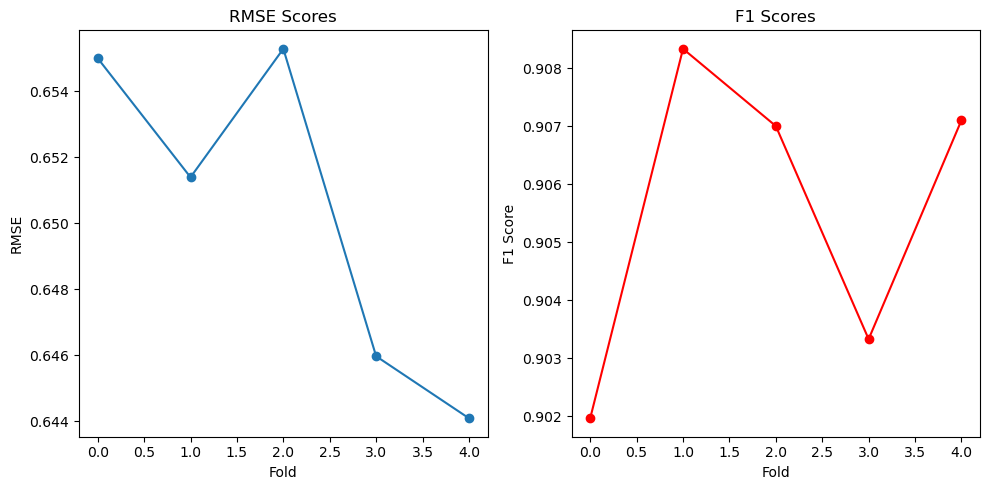

In [219]:
def cross_validate_with_metrics_groupwise(ratings, k_folds=5, k=5, threshold=3.5):
    '''
    Perform group-wise k-fold cross-validation on the ratings data and calculate multiple evaluation metrics.

    @param ratings: DataFrame containing the ratings data with 'UserID' column
    @param k_folds: int, number of folds for cross-validation (default: 5)
    @param k: int, number of nearest neighbors to use in prediction (default: 5)
    @param threshold: float, threshold for binary classification in F1 score calculation (default: 3.5)
    @return: None (prints and plots RMSE and F1 scores for each fold and their averages)
    '''
    gkf = GroupKFold(n_splits=k_folds)
    rmse_scores = []
    f1_scores = []
    
    for train_idx, test_idx in gkf.split(ratings, groups=ratings['UserID']):
        train_ratings_fold = ratings.iloc[train_idx].reset_index(drop=True)
        test_ratings_fold = ratings.iloc[test_idx].reset_index(drop=True)
        
        predicted, true = predict_test_set_ratings(test_ratings_fold, train_ratings_fold, k)
        
        # Handle any remaining NaNs
        if np.isnan(predicted).sum() > 0:
            user_means = train_ratings_fold.groupby('UserID')['Rating'].mean().to_dict()
            predicted = [user_means.get(uid, train_ratings_fold['Rating'].mean()) 
                         if np.isnan(r) else r for r, uid in zip(predicted, test_ratings_fold['UserID'])]
            predicted = np.array(predicted)
        
        rmse = calculate_rmse(predicted, true)
        _, _, f1 = calculate_precision_recall_f1(predicted, true, threshold)
        
        rmse_scores.append(rmse)
        f1_scores.append(f1)
        
        print(f"Fold RMSE: {rmse}, F1: {f1}")
    
    print(f"Average RMSE across {k_folds} folds: {np.mean(rmse_scores)}")
    print(f"Average F1 across {k_folds} folds: {np.mean(f1_scores)}")
    
    # Plotting the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(rmse_scores, marker='o')
    plt.title('RMSE Scores')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(f1_scores, marker='o', color='red')
    plt.title('F1 Scores')
    plt.xlabel('Fold') 
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()

# Perform the group-wise split
train_ratings, test_ratings = split_ratings_groupwise(ratings, test_size=0.2)

print(f"Training set size: {train_ratings.shape}")
print(f"Test set size: {test_ratings.shape}")

# Evaluate the group recommender system
cross_validate_with_metrics_groupwise(ratings, k_folds=5, k=5, threshold=3.5)